CAPÍTULO 13 - Modelos Lineares Generalizados
-


13.1 Introdução

Nem toda variável de resposta é contínua, portanto nem sempre uma regressão linear será o modelo correto em todas as ocasiões.  
Uma classe geral de modelos chamada GLM (Generalizad Linear Models, ou modelos lineares generalizados) pode dar conta desse tipo de dado.

13.2 Regressão logística

Regressão logística é muito usada para uma variável de resposta binária.

In [823]:
import pandas as pd

acs = pd.read_csv('../../data/acs_ny.csv')
print(acs.columns)

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')


In [824]:
print(acs.head())

  Acres  FamilyIncome   FamilyType  NumBedrooms  NumChildren  NumPeople  \
0  1-10           150      Married            4            1          3   
1  1-10           180  Female Head            3            2          4   
2  1-10           280  Female Head            4            0          2   
3  1-10           330  Female Head            2            1          2   
4  1-10           330    Male Head            3            1          2   

   NumRooms         NumUnits  NumVehicles  NumWorkers   OwnRent    YearBuilt  \
0         9  Single detached            1           0  Mortgage    1950-1959   
1         6  Single detached            2           0    Rented  Before 1939   
2         8  Single detached            3           1  Mortgage    2000-2004   
3         4  Single detached            1           0    Rented    1950-1959   
4         5  Single attached            1           0  Mortgage  Before 1939   

   HouseCosts  ElectricBill FoodStamp HeatingFuel  Insurance        

Para modelar esse dados, devemos inicialmente criar uma variável de resposta binária. Nesse caso a variável FamilyIncome.

In [825]:
acs['ge150k'] = pd.cut(acs['FamilyIncome'], #refencia a coluna que será usada
                       [0,150000, acs['FamilyIncome'].max()], #cria dois intervalos, de 0 à 150000 e de 150000 até o valor máximo da coluna
                       labels=[0, 1]) #atribuí um rotulo a cada intervalo 0 = renda até 150000, 1 = renda acima de 150000

acs['ge150k_i'] = acs['ge150k'].astype('int64') #converte os rotulos para valores inteiros, se não fizesemos isso a coluna sería category

print(acs['ge150k_i'].value_counts())

ge150k_i
0    18294
1     4451
Name: count, dtype: int64


Ao fazer isso, criamos uma variável binária

In [826]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22745 entries, 0 to 22744
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Acres         22745 non-null  object  
 1   FamilyIncome  22745 non-null  int64   
 2   FamilyType    22745 non-null  object  
 3   NumBedrooms   22745 non-null  int64   
 4   NumChildren   22745 non-null  int64   
 5   NumPeople     22745 non-null  int64   
 6   NumRooms      22745 non-null  int64   
 7   NumUnits      22745 non-null  object  
 8   NumVehicles   22745 non-null  int64   
 9   NumWorkers    22745 non-null  int64   
 10  OwnRent       22745 non-null  object  
 11  YearBuilt     22745 non-null  object  
 12  HouseCosts    22745 non-null  int64   
 13  ElectricBill  22745 non-null  int64   
 14  FoodStamp     22745 non-null  object  
 15  HeatingFuel   22722 non-null  object  
 16  Insurance     22745 non-null  int64   
 17  Language      22745 non-null  object  
 18  ge150k

13.2.1 Usando a statsmodels

Para fazer a regressão logística, podemos usar a regressão logit. A sintaxe é a mesma usada para regressão linear.

In [827]:
import statsmodels.formula.api as smf 

model = smf.logit('ge150k_i ~ HouseCosts + NumWorkers + OwnRent + NumBedrooms + FamilyType',
                  data=acs)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.391651
         Iterations 7


In [828]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               ge150k_i   No. Observations:                22745
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                            7
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.2078
Time:                        17:46:40   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -11244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8081      0.120    -48.456      0.000      -6.043      -5.573
OwnRent[T.Outright]         1.8276      0.208      8.782      0.000       1.420       2.236


Interpretar os dados de uma regessão logística não é tão simples quanto interpretar os dados de uma regressão linear. Em uma regressão logística e outros modelos lineares generalizados, há uma transformação na forma de uma função de link que deve ser desfeita para interpretar o resultado.

Para interpretar o nosso modelo logístico precisamos exponenciar os resultados.

In [829]:
import numpy as np

odds_ratios = np.exp(results.params)
print(odds_ratios)

Intercept                  0.003003
OwnRent[T.Outright]        6.219147
OwnRent[T.Rented]          0.416310
FamilyType[T.Male Head]    1.332901
FamilyType[T.Married]      4.005636
HouseCosts                 1.000731
NumWorkers                 1.799117
NumBedrooms                1.266852
dtype: float64


Os valores estão interpretados como razões de probabilidades. Podemos pensar em uma razão de possibilidades como quantas vezes os resultado será "provável".   
Exemplo: podemos dizer que a cada incremento de unidade em NumBedrooms as chances de FamilyIncome ser maior que 150000 aumenta em 1,27 vezes.  
Uma interpretasção semelhante pode ser usada em variáveis categorizadas.

In [830]:
#os três valores de ownrent
print(acs.OwnRent.unique())

['Mortgage' 'Rented' 'Outright']


Um exemplo de interpretação seria dizer que as chaces de familyIncome ser maior que 150000 aumenta 1,82 vezes quando a casa é própria em comparação com estar financiada.

13.2.2 Usando sklearn

Lembre-se, ao usar sklear as variáveis dummy precisam ser criadas manualmente.

In [831]:
predictors = pd.get_dummies(
    acs[['HouseCosts', 'NumWorkers', 'OwnRent', 'NumBedrooms', 'FamilyType']],
    drop_first=True
)

In [832]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(solver='liblinear', max_iter=900)

In [833]:
#adequação de nosso modelo pode ser feita dp mesmo modo que na regressão linear.

results = lr.fit(X=predictors, y=acs['ge150k_i'])

#obtemos os coeficientes e o intercepto do mesmo modo
print(results.coef_, '\n')
print(results.intercept_)

[[ 7.11126999e-04  5.61096857e-01  2.22827789e-01  1.20384554e+00
  -7.16411237e-01  3.42249999e-01  1.22562424e+00]] 

[-5.51245127]


In [834]:
#podemos exibir os resultados de forma mais atraente

values = np.append(results.intercept_, results.coef_)

#obtem os nomes dos valores
names = np.append('intercept', predictors.columns)

#coloca tudo em um dataframe com rótulos
results = pd.DataFrame(values, index = names,
                       columns=['coef'] # os colchetes são necessários nesse caso
                       )
print(results)

                          coef
intercept            -5.512451
HouseCosts            0.000711
NumWorkers            0.561097
NumBedrooms           0.222828
OwnRent_Outright      1.203846
OwnRent_Rented       -0.716411
FamilyType_Male Head  0.342250
FamilyType_Married    1.225624


In [835]:
#Para interpretar nossos coeficientes precisamos exponenciar nossos dados
results['or'] = np.exp(results['coef'])
print(results)

                          coef        or
intercept            -5.512451  0.004036
HouseCosts            0.000711  1.000711
NumWorkers            0.561097  1.752594
NumBedrooms           0.222828  1.249605
OwnRent_Outright      1.203846  3.332909
OwnRent_Rented       -0.716411  0.488502
FamilyType_Male Head  0.342250  1.408112
FamilyType_Married    1.225624  3.406292


13.3 Regressão de Poisson

A regressão de Poisson é usada para modelar contagens ou taxas de eventos que ocorrem de forma independente.

A regressão de poisson é feita quando nossa variável de resposta possui dados de contador, nos dados acs temos a variável NumChildren

13.3.1 Usando a statsmodels

Podemos fazer ussa regressão usando a função poisson da statsmodels

Precisamos antes escalar os dados

In [836]:
from sklearn.preprocessing import StandardScaler

# Selecionar as colunas numéricas para escalonamento
columns_to_scale = ['FamilyIncome']

# Criar um scaler e ajustar e transformar os dados
scaler = StandardScaler()
acs[columns_to_scale] = scaler.fit_transform(acs[columns_to_scale])

# Ajustar o modelo novamente
results = smf.poisson('NumChildren ~ FamilyIncome + FamilyType + OwnRent', data=acs).fit()

Optimization terminated successfully.
         Current function value: 1.348824
         Iterations 7


In [837]:
print(results.summary())

                          Poisson Regression Results                          
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                        Poisson   Df Residuals:                    22739
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                0.009627
Time:                        17:46:41   Log-Likelihood:                -30679.
converged:                       True   LL-Null:                       -30977.
Covariance Type:            nonrobust   LLR p-value:                1.190e-126
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.2659      0.021    -12.966      0.000      -0.306      -0.226
FamilyType[T.Male Head]    -0.0630      0.038     -1.637      0.102      -0.138       0.012


A vantagem de usar modelo linear generalizado é que os únicos dados que devem ser alterados são a family do modelo para a adequação e a função link que transforma nossos dados.

Podemos usar a função gml para fazer todos os mesmos cálculos.

In [838]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [839]:
model = smf.glm(
    'NumChildren ~ FamilyIncome + FamilyType + OwnRent',
    data=acs,
    #precisamos criar uma instância da classe sm.genmod.families.links.log antes de passá-la para o argumento family.
    family=sm.families.Poisson(link=sm.families.links.Log())
)

In [840]:
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22739
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30679.
Date:                Sun, 30 Jun 2024   Deviance:                       34643.
Time:                        17:46:41   Pearson chi2:                 3.34e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02588
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

13.3.2 Regressão binominal negativa para superdispersão

Se nossas suposições para regressão de Poisson forem violadas - isto é, se nossos dadods tiverem superdispersão -, podemos fazer uma regressão binominal negativa.

In [841]:
model = smf.glm(
    'NumChildren ~ FamilyIncome + FamilyType + OwnRent',
    data=acs,
    family=sm.families.NegativeBinomial(alpha=1.0, link=sm.genmod.families.links.Log())
)
results = model.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22739
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29749.
Date:                Sun, 30 Jun 2024   Deviance:                       20731.
Time:                        17:46:42   Pearson chi2:                 1.77e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01445
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

13.4 Outros modelos lineares generalizados

Na documentação oficial para GLM na statsmdoels lista as várias famílias que podem ser passadas como parâmetro para glm

13.5 Análise de sobrevivêmcia

Tecnicamente a análise de sobrevivencia não é um método de regressão, porém ela é usada para a modelagem do tempo de determinado evento.   
Por exemplo, essa abordagem poderia ser usada em uma pesquisa médica para analisar se um tratamento poderia evitar um evento adverbio sério melhor que um tratamento padrão ou diferente.

A análise de sobrevivência é feita com a biblioteca lifelines. Nesse caso usaremos os dados bladder do pacote survival de R.

In [842]:
bladder = pd.read_csv('../../data/bladder.csv')
print(bladder.head())

   id  rx  number  size  stop  event  enum
0   1   1       1     3     1      0     1
1   1   1       1     3     1      0     2
2   1   1       1     3     1      0     3
3   1   1       1     3     1      0     4
4   2   1       2     1     4      0     1


In [843]:
#aqui os contadores dos diferentes tratamentos
print(bladder['rx'].value_counts())

rx
1    188
2    152
Name: count, dtype: int64


In [844]:
from lifelines import KaplanMeierFitter

A variável stop informa quando um evento ocorre, enquanto a variável event sinaliza se o evnto de interesse aconteceu.   
A variável event pode ser 0 porque as pessoas podem deixar de fazer o retorno. Conforme observamos antes esse tipo de dado é chamado de censurado

In [845]:
kmf = KaplanMeierFitter()
kmf.fit(bladder['stop'],event_observed=bladder['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 340 total observations, 228 right-censored observations>

Podemos plotar a curva de sobrevivencia

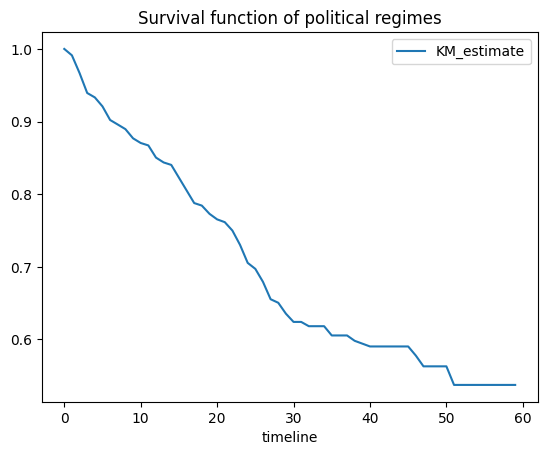

In [846]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax = kmf.survival_function_.plot(ax=ax)
ax.set_title('Survival function of political regimes')
plt.show()

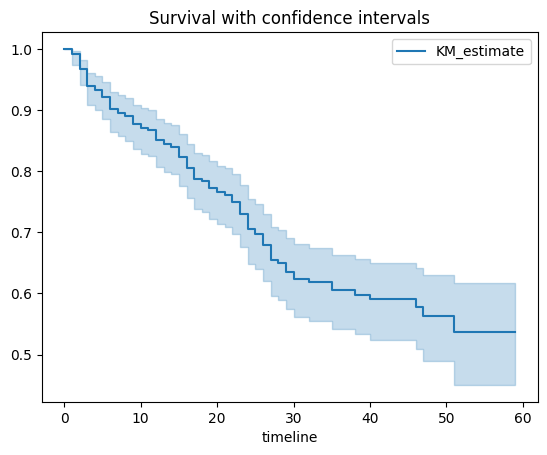

In [847]:
#podemos exibir o intervalo de confiança da nossa curva de sobrevivência

fig, ax = plt.subplots()
ax = kmf.plot(ax=ax)
ax.set_title('Survival with confidence intervals')
plt.show()

Plotamos apenas a curva de sobrevivencia, podemos fazer um modelo para prever a taxa de sobrevivência.  
Um modelo desse tipo chama-se modelo de risco proporcional de Cox (Cox proportional hazards model).

In [848]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

In [849]:
#passamos então as colunas a serem usadas como preditoras
cph_bladder_df = bladder[['rx', 'number', 'size',
                          'enum', 'stop', 'event']]
cph.fit(cph_bladder_df, duration_col='stop', event_col='event')

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>

In [850]:
#agora podemos usar o método print_sumarry para exibir os coeficientes.
print(cph.print_summary())

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>
             duration col = 'stop'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 340
number of events observed = 112
   partial log-likelihood = -565.66
         time fit was run = 2024-06-30 20:46:42 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
rx        -0.60      0.55      0.20           -0.99           -0.20                0.37                0.82
number     0.22      1.24      0.05            0.13            0.31                1.13                1.36
size      -0.06      0.94      0.07           -0.20            0.08                0.82                1.09
enum      -0.60      0.55      0.09           -0.79           -0.42                0.45                0.66

           cmp to     z      p  -log2(p)
covariate                               
rx           0.00 -2.97 <0.005      8.41
number       0.00  4.68 <0.005     18.38
size         0.00 -0.80   0.42      1.24
enum         0.00 -6.42 <0.005     32.80
---
Concordance = 0.75
Partial AIC = 1139.32
log-likelihood ratio test = 67.21 on 4 df
-log2(p) of ll-ratio test = 43.37

None


13.5.1 Testando as suposições do modelo de Cox

In [851]:
rx1 = bladder.loc[bladder['rx'] == 1]
rx2 = bladder.loc[bladder['rx'] == 2]

kmf1 = KaplanMeierFitter()
kmf1.fit(rx1['stop'], event_observed=rx1['event'])

kmf2 = KaplanMeierFitter()
kmf2.fit(rx2['stop'], event_observed=rx2['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 152 total observations, 112 right-censored observations>

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>
             duration col = 'stop'
                event col = 'event'
                   strata = rx
      baseline estimation = breslow
   number of observations = 340
number of events observed = 112
   partial log-likelihood = -493.52
         time fit was run = 2024-06-30 20:46:43 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
number     0.21      1.24      0.05            0.12            0.30                1.13                1.36
size      -0.05      0.95      0.07           -0.19            0.08                0.82                1.09
enum      -0.61      0.55      0.09           -0.79           -0.42                0.45                0.66

           cmp to     z      p  -log2(p)
covariate                               
number       0.00  4.60 <0.005     17.84
size         0.00 -0.77   0.44      1.19
enum         0.00 -6.45 <0.005     33.07
---
Concordance = 0.74
Partial AIC = 993.04
log-likelihood ratio test = 61.84 on 3 df
-log2(p) of ll-ratio test = 41.93

None


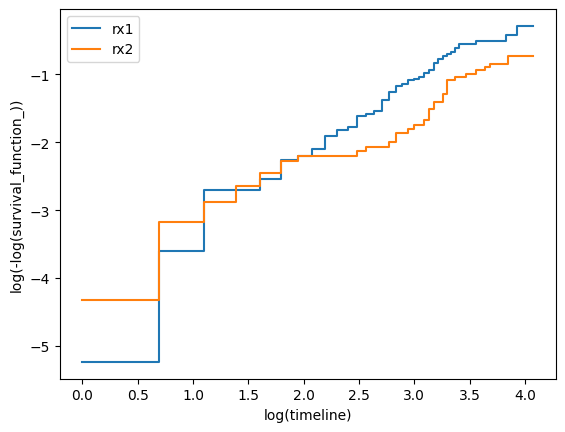

In [852]:
fig, axes = plt.subplots()

#coloca as duas plotagens nos mesmos eixos
kmf1.plot_loglogs(ax=axes)
kmf2.plot_loglogs(ax=axes)

axes.legend(['rx1', 'rx2'])

#como as linhas se cruzam faz sentido estratificar nossa análise
cph_strat = CoxPHFitter()
cph_strat.fit(cph_bladder_df, duration_col='stop', event_col='event',
              strata=['rx'])

print(cph_strat.print_summary())

plt.show()